**NAME: SSENOGA Frank**
**REG. NO: 2023/HD05/04746U**
**STUDENT NO: 2300704746**
**COURSE UNIT: MACHINE LEARNIG **

The **Attrition rate,** also known as churn rate, can be defined as the rate at which employees leave an organization from a specific group over a particular period of time.
Employees leave the company for personal and professional reasons like retirement, lower growth potential, lower work satisfaction, lower pay rate, bad work environment, etc

In [14]:
from google.colab import drive

In [15]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing libraries**

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


# **Importing the dataframe**

In [17]:
df = pd.read_csv('/content/drive/MyDrive/ML DATA/employee_attrition_dataset.csv')

In [18]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


This table displays a a cateogorical variable with its unique value and the total frequesncy for each value

# **Identification of the total number of rows and columns**

In [20]:
df.shape

(1470, 35)

# **Summarising key statistics for numerical variables**

In [21]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Observations**
we can observe that column **EmployeeCount** is set to one, **StandardHours** column indicate that all employee work for a maximum of 80 hours and also all employees are above the **Age** of 18 years.
These are irrelevant colums and we shall have to drop them

# **Deleting irrelevant columns from the data set**

In [22]:
df = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


The number of columns have reduced from 35 to 31

# **Identification of missing values**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# **Identification of the total number of missing values for each variable**

In [24]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# **Checking for repeated / duplicated values in our dataset**

In [25]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    1470
dtype: int64
1470


From the dataset we have no duplicated/ repeated values

# **Exploratory Data Analysis (EDA)**



## **Distrbution of categorical variables(Attrition)**

In [26]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## **Data visualisation for the target variable (Attrition)**

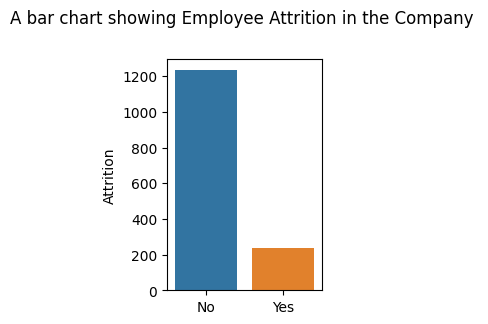

In [27]:
# Data visualisation for the distribution of the target variable 'Attrition'
x=df['Attrition'].value_counts()
plt.figure(figsize =(2,3))
plt.title('A bar chart showing Employee Attrition in the Company ', y=1.12)
sns.barplot(x= x.index, y=x)
plt.show()

# **Observations**
From the graph we can observe that the total number of employees who left the company are 237 and those that are still in the complany are 1233.
So from the graph above, there exists an imbalance in the target variable

## **Visualisation of Employee Attrition using a pie-chart**

```
```



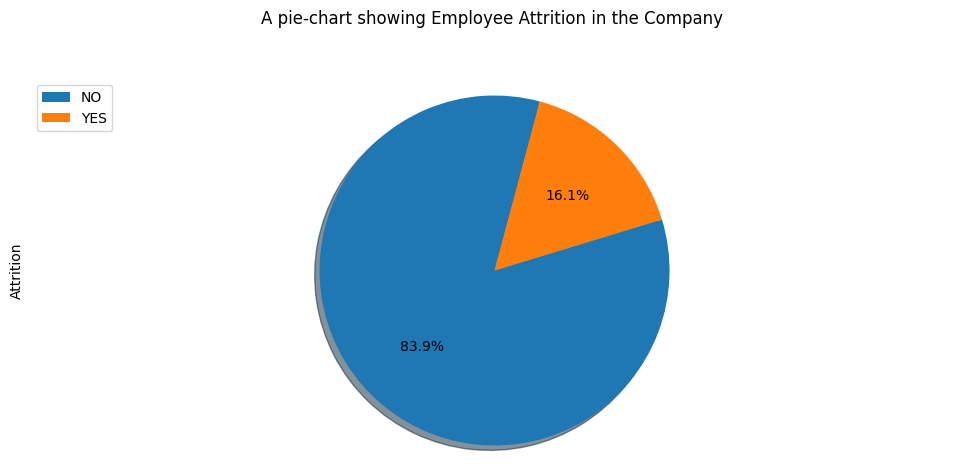

In [28]:
labels = 'NO','YES'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(12, 5),
                            autopct='%1.1f%%',
                            startangle=75,
                            shadow=True,
                            labels=None,
                            )

plt.title('A pie-chart showing Employee Attrition in the Company ', y=1.12)
plt.axis('equal')
plt.legend(labels=labels, loc='upper left')
plt.show()

## **Observations**
The attrition rate in our dataset stands at 16.1%

## ***Attrition distribution according to gender ***

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


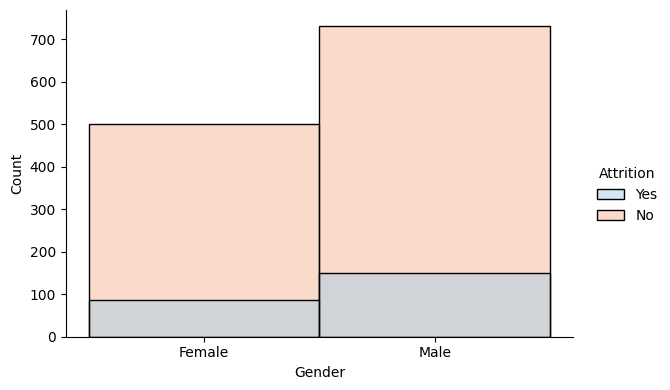

In [29]:
groupby_Gender = df.groupby("Gender")["Attrition"]
print(groupby_Gender.value_counts())
sns.displot(data = df, x = "Gender", hue = "Attrition", height=4, aspect=1.5, palette= 'RdBu_r')

### **Observation**
There is a greater number of male employees that leave the company as compared to female counterparts

## **Attrition distribution according to Business Travel**

<Axes: xlabel='count', ylabel='BusinessTravel'>

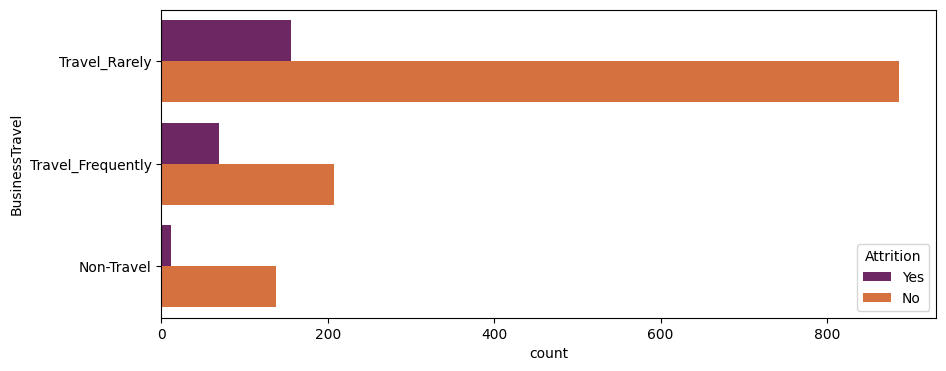

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(y="BusinessTravel", hue = "Attrition",data=df,palette='inferno')

Employees traveling rarely resigned/retired mostly (156 employes) and when percentage values are considered, employees traveling frequently resigned/retired mostly

# **Attrition distribution according to Education Field**

<Axes: xlabel='EducationField', ylabel='count'>

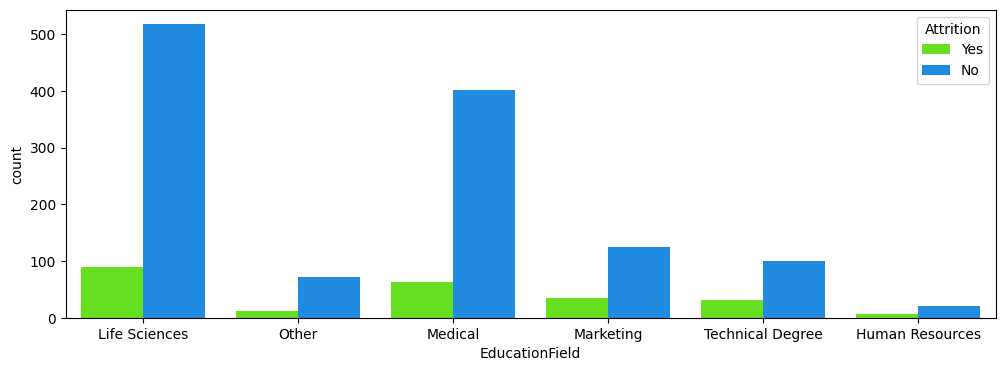

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(x="EducationField", hue = "Attrition",data=df,palette='gist_rainbow')

## **Observations**
Employees in the health sciences and in the medical department resign or quit most as compared to other departments of the data frame

# **Attrition distribution according to JobRole Field**

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

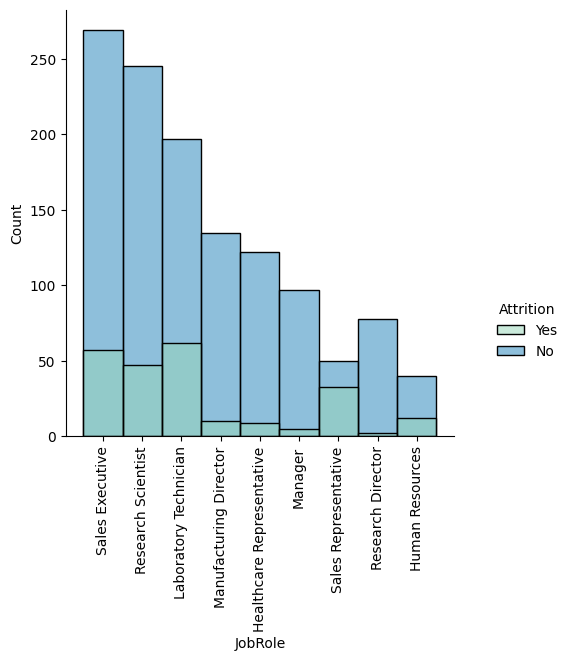

In [32]:

sns.displot(data = df, x = "JobRole", hue = "Attrition",height = 5, palette ='YlGnBu')
plt.xticks(rotation=90)

# **Distribution of monthly Income verses JobRole**

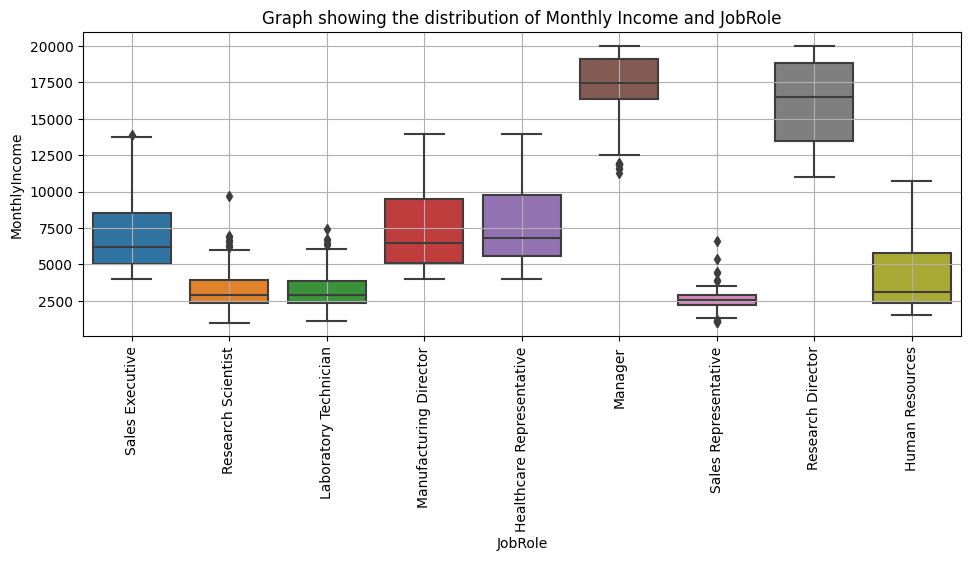

In [33]:
plt.figure(figsize=(10,4))
plt.title( 'Graph showing the distribution of Monthly Income and JobRole')
sns.boxplot(y=df["MonthlyIncome"],x=df["JobRole"])
plt.grid(True,alpha=1)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


# **Observations**
Managers and research Directors are most likely stay longer at the company their take home  salaries are high so low attrition rate counts for them as compared to Research scientists,laboratory techicans and sale representative who earn a low pay.

In [34]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [35]:
feature12=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']

In [36]:
list(enumerate(feature12))

[(0, 'BusinessTravel'),
 (1, 'Department'),
 (2, 'EducationField'),
 (3, 'Gender'),
 (4, 'JobRole'),
 (5, 'MaritalStatus')]

<Figure size 640x480 with 0 Axes>

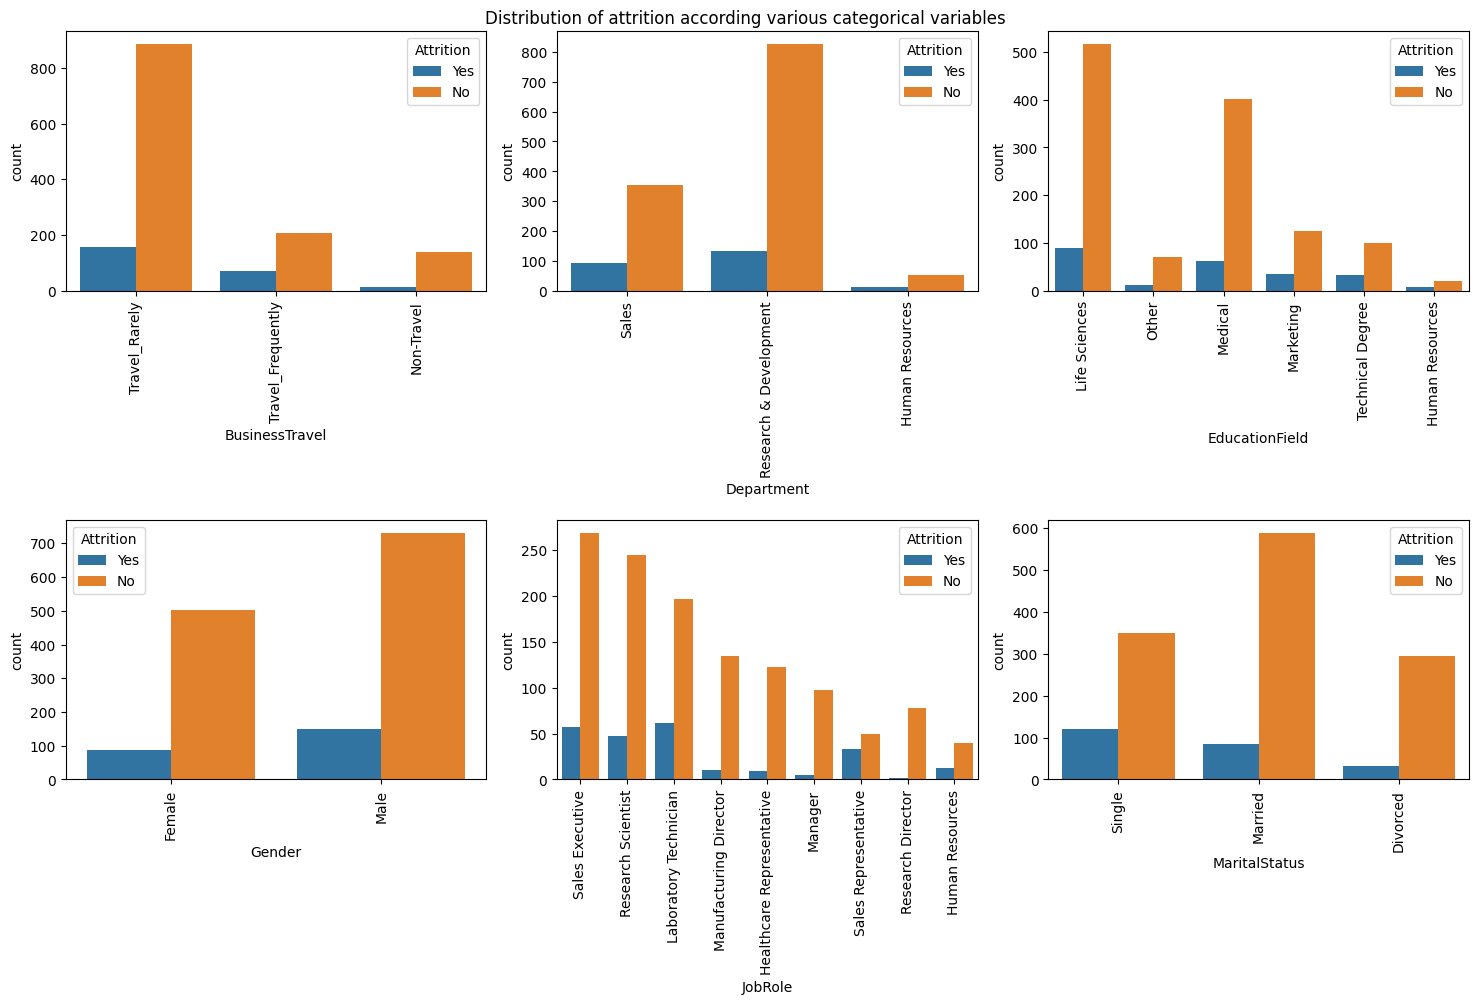

In [37]:
plt.suptitle("Distribution of attrition according various categorical variables")
plt.figure(figsize=(15,13))
for i in enumerate(feature12):
  plt.subplot(3,3,i[0]+1)
  plt.tight_layout()
  plt.suptitle("Distribution of attrition according various categorical variables")
  sns.countplot(x=i[1], hue ='Attrition', data = df)
  plt.xticks(rotation = 90)

# **Distribution according to contineous variables**

In [38]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [39]:
feature12=['Age','DailyRate','DistanceFromHome','Education','HourlyRate','YearsAtCompany','MonthlyIncome','MonthlyRate','PerformanceRating','TotalWorkingYears']

In [40]:
list(enumerate(feature12))

[(0, 'Age'),
 (1, 'DailyRate'),
 (2, 'DistanceFromHome'),
 (3, 'Education'),
 (4, 'HourlyRate'),
 (5, 'YearsAtCompany'),
 (6, 'MonthlyIncome'),
 (7, 'MonthlyRate'),
 (8, 'PerformanceRating'),
 (9, 'TotalWorkingYears')]

<Figure size 640x480 with 0 Axes>

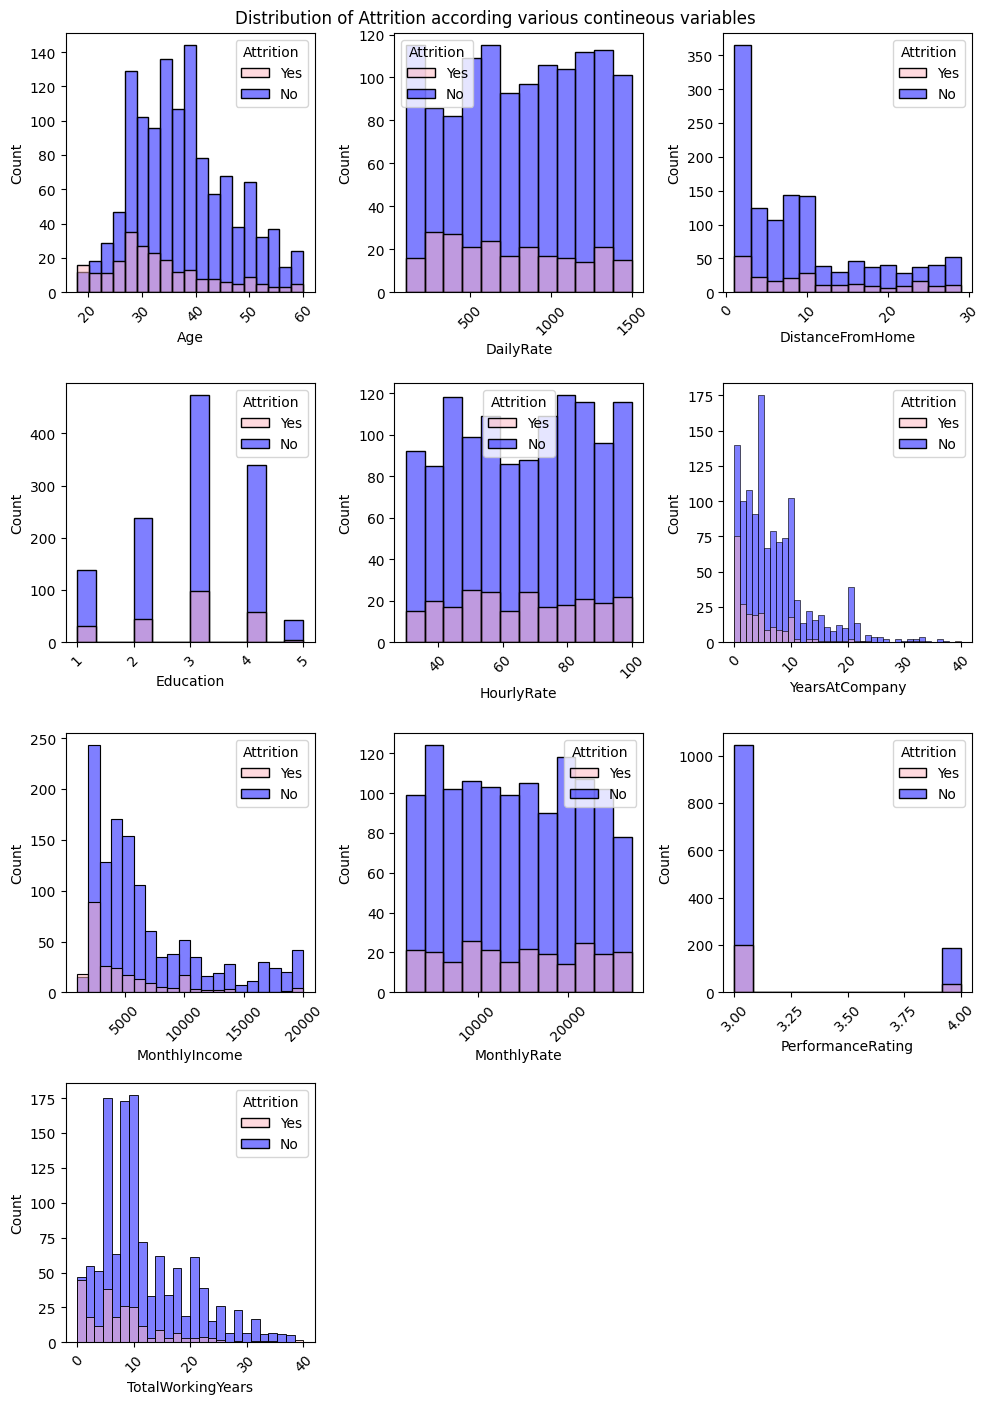

In [41]:
plt.suptitle("Distribution of Attrition according various contineous variables")
plt.figure(figsize=(10,14))
for i in enumerate(feature12):
  plt.subplot(4,3,i[0]+1)
  plt.suptitle("Distribution of Attrition according various contineous variables")
  plt.tight_layout()
  sns.histplot(x=i[1], hue ='Attrition', data = df, palette=['lightpink','blue'])
  plt.xticks(rotation = 45)

# **Visualisation of contineous variable using boxplots**

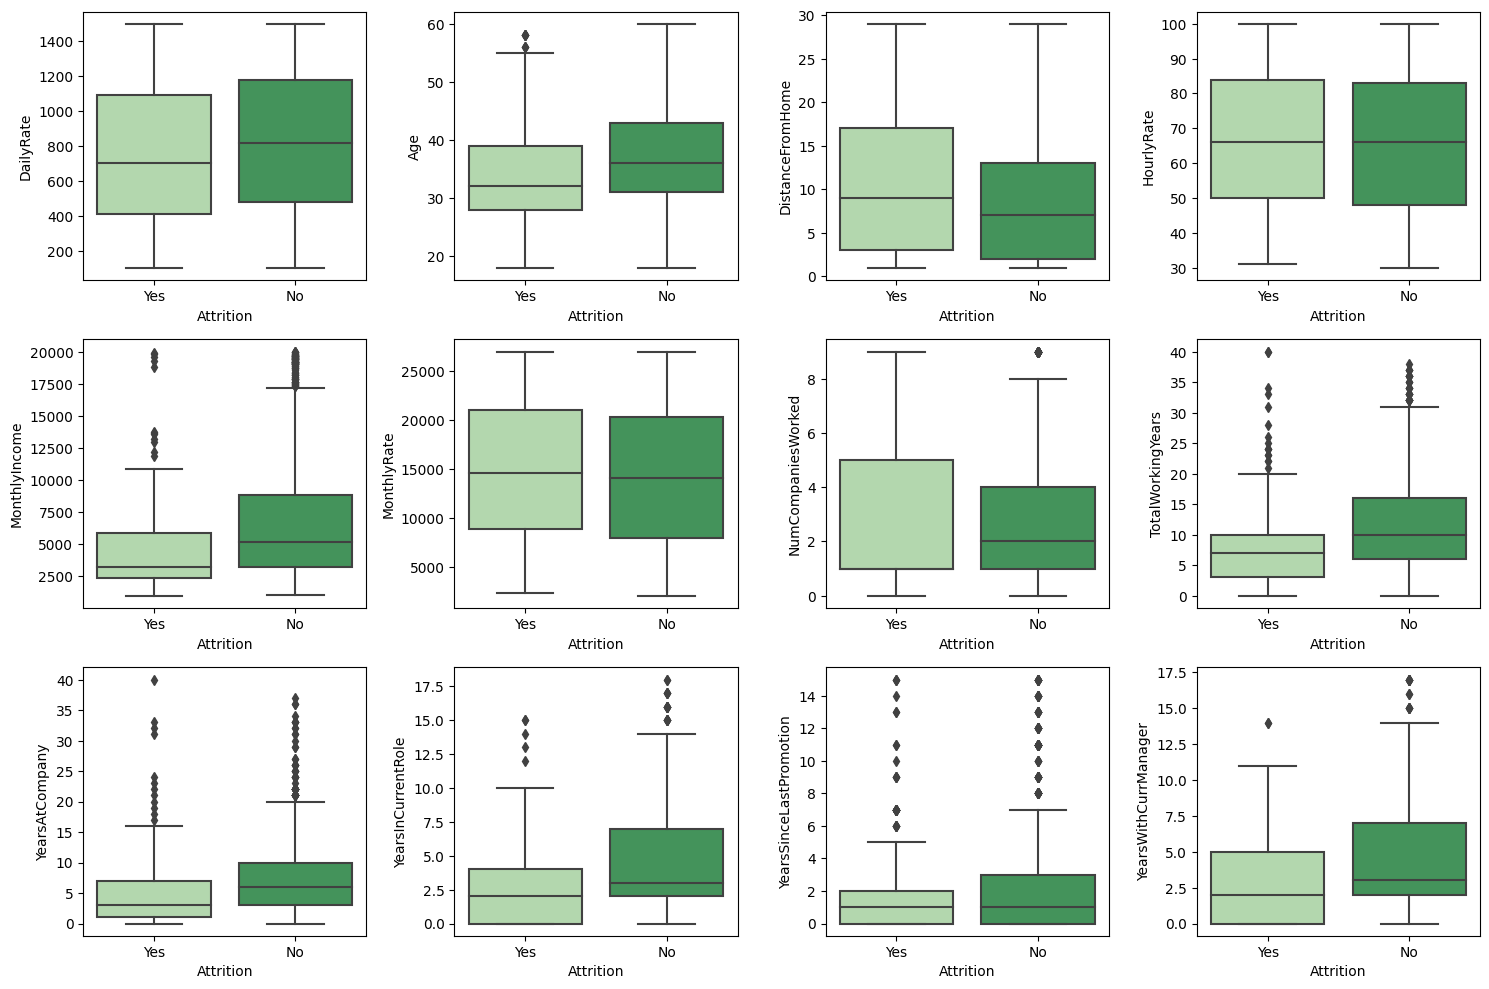

In [42]:
fig, axss = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='DailyRate', data=df, ax=axss[0][0],palette="Greens")
sns.boxplot(x='Attrition', y ='Age', data=df, ax=axss[0][1],palette="Greens")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=df, ax=axss[0][2],palette="Greens")
sns.boxplot(x='Attrition', y ='HourlyRate', data=df, ax=axss[0][3],palette="Greens")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=df, ax=axss[1][0],palette="Greens")
sns.boxplot(x='Attrition', y ='MonthlyRate', data=df, ax=axss[1][1],palette="Greens")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=df, ax=axss[1][2],palette="Greens")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=df, ax=axss[1][3],palette="Greens")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=df, ax=axss[2][0],palette="Greens")
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=df, ax=axss[2][1],palette="Greens")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=df, ax=axss[2][2],palette="Greens")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=df, ax=axss[2][3],palette="Greens")
plt.tight_layout()
plt.savefig('numerical_dist.png');

# **Feature engineering**

In [43]:
# correlation matrix using a heatmap

<ipython-input-44-19f3e465ae5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidth=1, annot=True, fmt=".2f",cmap="RdYlGn", annot_kws={"size":6,"fontweight":'bold'})


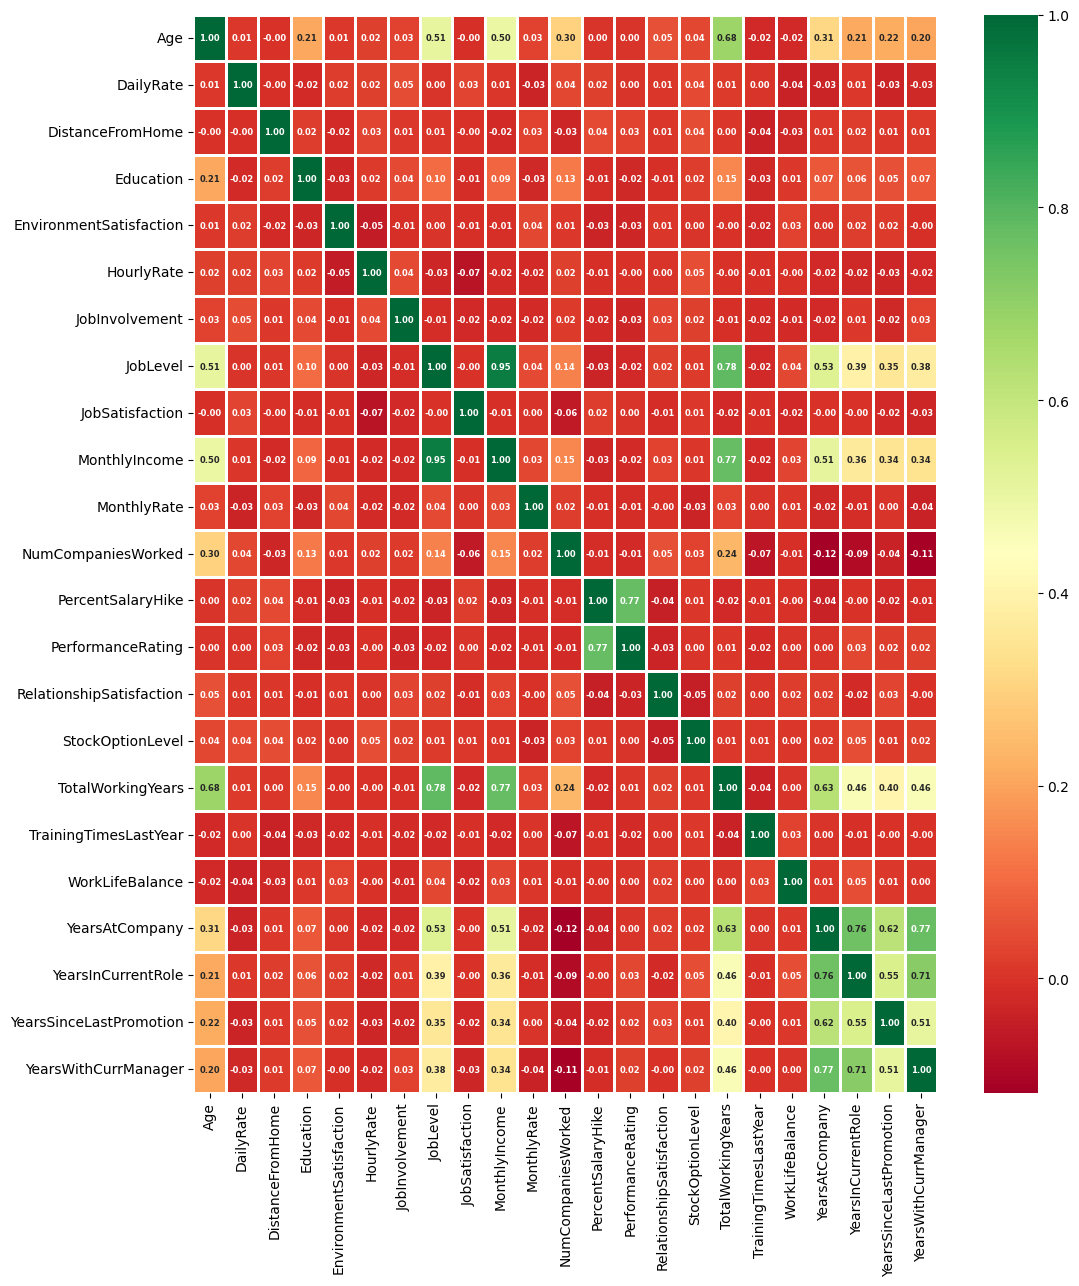

In [44]:
plt.figure(figsize=(12, 14))
sns.heatmap(df.corr(), linewidth=1, annot=True, fmt=".2f",cmap="RdYlGn", annot_kws={"size":6,"fontweight":'bold'})
plt.show()

**Observations**

**Job level** and **monthly income** are strongly correlated
**Job level** and **TotalWorkingYears** are strongly correlating
total working years are correlating with monthly income



```
# This is formatted as code
```

# **Encoding Norminal categorical variables**

### **Attrition**----yes, no
### **Overtime** ----yes , no
### **Gneder**---- Male and Female

In [45]:
# Importing categorical data enconding libaries
# using one-hot encoding technique
from sklearn.preprocessing import LabelEncoder
object_columns = ['Attrition','BusinessTravel','Gender', 'OverTime']
le = LabelEncoder()
for column in object_columns:
    df[column] = le.fit_transform(df[column])

In [46]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,2,Medical,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,Research & Development,6,1,Medical,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,Research & Development,4,3,Life Sciences,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,Sales,2,3,Medical,4,1,...,3,4,0,17,3,2,9,6,0,8


# **Encoding Ordinal categorical variables**

In [47]:
# I used dummy encoding techique to  encode ordinal variables

In [48]:
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(data=df, columns=dummies)
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279,8,1,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373,2,2,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1,1392,3,4,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,591,2,1,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


#  **Identify the most relevant feature for attrition in the dataset**

In [49]:
#Splitting the data
xa = df.drop(columns=['Attrition'])  # Features
ya = df['Attrition']  # Target variable

In [50]:
#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(xa, ya)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(xa, ya)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

feature_scores = pd.DataFrame({'Feature': xa.columns, 'Combined_Score': combined_scores})
feature_scores = feature_scores.sort_values(by='Combined_Score', ascending=False)
feature_scores

,Feature,Combined_Score
11,MonthlyIncome,127960.782513
12,MonthlyRate,1196.971469
2,DailyRate,961.307134
19,TotalWorkingYears,274.974109
22,YearsAtCompany,169.101678
14,OverTime,158.501524
23,YearsInCurrentRole,156.360899
25,YearsWithCurrManager,147.383845
0,Age,122.331164
46,MaritalStatus_Single,77.378654


I used chi-squared statistics and ANOVA F-statistic to apply feature selection techniques and identify the most relevant feature for attrition in the dataset

In [51]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279,8,1,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373,2,2,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1,1392,3,4,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,591,2,1,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


we are going to remove features with combined score of 0.5 and below so as to increase on the accuracy and perfomance of our model

In [52]:
df = df.drop(columns = ['PerformanceRating', 'JobRole_Research Scientist', 'BusinessTravel'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


In [53]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [54]:
numerical_list = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'  ]

# **Model Building and Splitting the dataset into training and testing sets**

In [55]:
Tx = df.drop(columns=['Attrition'])  # Features
Ty = df['Attrition']  # Target variable

In [56]:
from sklearn.model_selection import train_test_split
Tx_train, Tx_test, Ty_train, Ty_test = train_test_split(Tx, Ty, test_size= 0.20, random_state=0)

**Scaling the data using standard scaler**

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Tx_train[numerical_list] = scaler.fit_transform(Tx_train[numerical_list])
Tx_test[numerical_list] = scaler.transform(Tx_test[numerical_list])

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(Tx_train, Ty_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [59]:
Ty_pred = classifier.predict(Tx_test)

# **Classification report and the confusion matrix**

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(Ty_test, Ty_pred)
print(cm)
accuracy_score(Ty_test, Ty_pred)

[[212  33]
 [ 33  16]]


0.7755102040816326

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.33      0.33      0.33        49

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294



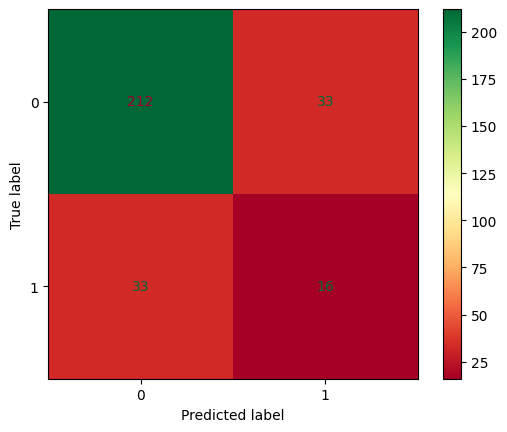

In [61]:
print(classification_report(Ty_test, Ty_pred))
ConfusionMatrixDisplay.from_predictions(Ty_test, Ty_pred, cmap = 'RdYlGn')


# **Feature Selection and Importance Analysis**

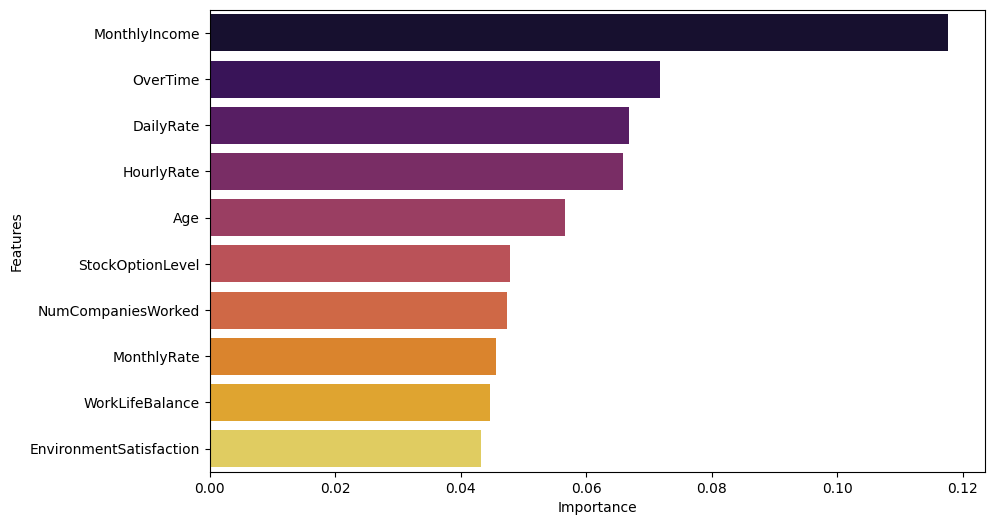

In [62]:
IP=pd.DataFrame({"Features":np.array(Tx.columns),"Importance":classifier.feature_importances_})
IP=IP.sort_values(by=['Importance'],ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Features', data=IP[:10],palette='inferno')
plt.show()

# **Balancing the target variable (Attrition)**

In [63]:
Ty.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [64]:
print("Before OverSampling, counts of label '1': {}".format(sum(Ty_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Ty_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import NearMiss
# Print the class distribution before resampling
print("Class distribution before resampling:", Counter(Ty))

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
Tx_resampled, Ty_resampled = smote.fit_resample(Tx, Ty)

# Print the class distribution after resampling
print("Class distribution after resampling:", Counter(Ty_resampled))

Before OverSampling, counts of label '1': 188
Before OverSampling, counts of label '0': 988 

Class distribution before resampling: Counter({0: 1233, 1: 237})
Class distribution after resampling: Counter({1: 1233, 0: 1233})


In [65]:
Ty_resampled.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

**Resplitting the data into training and testing**

In [66]:
from sklearn.model_selection import train_test_split
Tx_train, Tx_test, Ty_train, Ty_test = train_test_split(Tx_resampled, Ty_resampled, test_size= 0.20, random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Tx_train[numerical_list] = scaler.fit_transform(Tx_train[numerical_list])
Tx_test[numerical_list] = scaler.transform(Tx_test[numerical_list])

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(Tx_train, Ty_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [69]:
Ty_pred = classifier.predict(Tx_test)

**Testing the performance of the model**

In [70]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(Ty_test, Ty_pred)
print(cm)
accuracy_score(Ty_test, Ty_pred)

[[186  45]
 [ 43 220]]


0.8218623481781376

**Our model has improved performance from 0.778 to 0.821**

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       231
           1       0.83      0.84      0.83       263

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



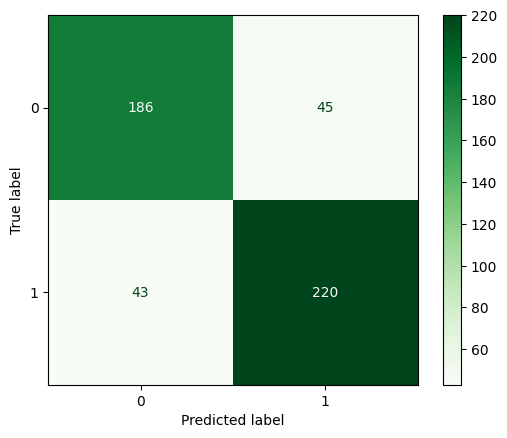

In [71]:
print(classification_report(Ty_test, Ty_pred))
ConfusionMatrixDisplay.from_predictions(Ty_test, Ty_pred, cmap = 'Greens')

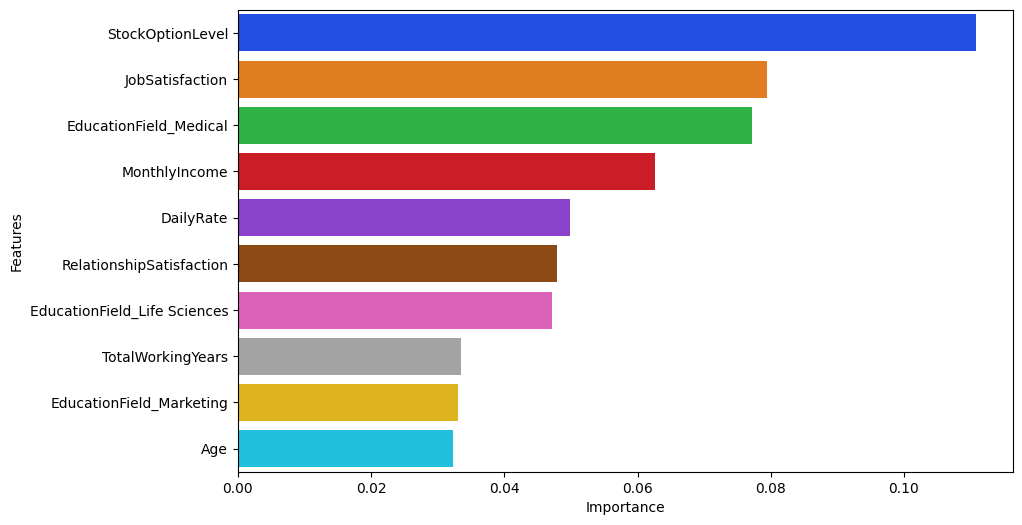

In [72]:
IP=pd.DataFrame({"Features":np.array(Tx.columns),"Importance":classifier.feature_importances_})
IP=IP.sort_values(by=['Importance'],ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Features', data=IP[:10], palette="bright")
plt.show()

# **Fine-tune the hyperparameters of the model**

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            mean_squared_error, \
                            mean_absolute_error

In [75]:
 #setup hyper parameter space
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}
              # create an instance of the grid search object
g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
#start_time = time.time()
g1.fit(Tx_train,Ty_train)
#duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params1 = g1.best_params_
cls_params1

{'criterion': 'entropy',
 'max_depth': 9,
 'max_leaf_nodes': 25,
 'min_samples_split': 6}

In [76]:
# compute performance on test set
model = g1.best_estimator_
Ty_pred = model.predict(Tx_test)
print('accuracy score: %.2f' % accuracy_score(Ty_test,Ty_pred))
print('precision score: %.2f' % precision_score(Ty_test,Ty_pred))
print('recall score: %.2f' % recall_score(Ty_test,Ty_pred))
print('f1 score: %.2f' % f1_score(Ty_test,Ty_pred))
#print('computation time: %.2f' % duration)

accuracy score: 0.80
precision score: 0.89
recall score: 0.71
f1 score: 0.79


In [77]:

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=Tx_train , y= Ty_train, cv= 10)
print('Accuracy: {:.2f}%' .format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%' .format (accuracies.std()*100))

Accuracy: 85.04%
Standard Deviation: 1.22%


# **Observations**
Variables like JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrentManager are highly correlated. These variables may lead to multicollinearity.
Two variables are considered perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences

1. The attrition rate is high for employees between 30-40 years
2. The attrition rate is high for employees that stay between 5-10 years at the company
3. Employees who earn between 10000-5000 dollars tend to quit the company
4. Employees who are single tend leave the company compared to married ones

# **Conclusions and recommendations**
1.   Encourage recruitment of married people because they tend to stay longer at the company than having Bachelors or singles
2.   Increase on the payment of workers so as to retain the workforce to reduce attrition rate.



